# 2.3 Exercises



In [98]:
import random
import math
import numpy as np

import scipy.stats as stats
import scipy.integrate as integrate

from matplotlib import pyplot as plt

## 1. Sampling

Suppose you are the lottery fairy in a weekly lottery, where 6
out of 49 unique numbers are drawn.
Instructions:
Draw the winning numbers for this week.

In [3]:
list_1_49 = list(range(1,50))
print(f'List: {list_1_49}')
print(f'Winning Numbers: {random.sample(list_1_49,6)}')

List: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Winning Numbers: [32, 4, 43, 6, 18, 20]


## 2. Probability Density Function

Consider a random variable X

with probability density function (PDF)   

$$f_{X}(x)=\frac{x}{4} e^{-x^{2} / 8}, \quad x \geq 0$$

Instructions:

    Define the PDF from above as a function f(). exp(a) computes ea

Check whether the function you have defined is indeed a PDF.

[Stats library allows to define a continuous PDF.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous)   


Define the PDF:

In [45]:
class functionEX1Class(stats.rv_continuous):

    "Wanted Function"

    def _pdf(self, x):
        return ((x/4) * math.exp((-x**2)/8))
    
my_function_1 = functionEX1Class(name='PDF1', a = 0, b = np.Inf)

Integrate over the domain

In [46]:
from scipy import integrate

my_function_1.cdf([-np.Inf,np.Inf])

array([0., 1.])

## 3. Expected Value and Variance

In this exercise you have to compute the expected value and the variance of the random variable X

considered in the previous exercise.

The PDF f() from the previous exercise is available in your working environment.

Instructions:

    Define a suitable function ex() which integrates to the expected value of X



* Compute the expected value of X

* Store the result in expected_value.

* Define a suitable function ex2() which integrates to the expected value of X2

* Compute the variance of X. Store the result in variance.

In [49]:
f_expected_value = my_function_1.mean()

In [51]:
f_variance = my_function_1.var()

In [53]:
print(f'Mean: {round(f_expected_value,3)}, Variance: {round(f_variance,3)}')

Mean: 2.507, Variance: 1.717


## 4. Standard Normal Distribution I

Let Z∼N(0,1).

Instructions:

* Compute ϕ(3), that is, the value of the standard normal density at c=3.

In [55]:
my_norm_1 = stats.norm()

In [57]:
my_norm_1.pdf(3)

0.0044318484119380075

## 5. Standard Normal Distribution II

Let Z∼N(0,1).

Instructions:

* Compute P(|Z|≤1.64) by using the function pnorm().

In [70]:
my_norm_1.cdf(1.64) - my_norm_1.cdf(-1.64)

0.8989948330517925

6. Normal Distribution I

Let Y∼N(5,25).

Instructions:

* Compute the 99% quantile of the given distribution, i.e., find y such that $\phi(\frac{y}{55})=0.99$.

In [77]:
my_norm_2 = stats.norm(5, math.sqrt(25))

In [78]:
my_norm_2.ppf(0.99)

16.631739370204205

## 7. Normal Distribution II

Let Y∼N(2,12).

Instructions:

* Generate 10 random numbers from this distribution.

In [85]:
my_norm_3 = stats.norm(2, math.sqrt(12))

In [109]:
np.random.seed(seed=123)
# [my_norm_3.rvs() for i in range(1,10)]
my_norm_3.rvs(10)

array([-1.76073473e+00,  5.45490597e+00,  2.98026627e+00, -3.21795795e+00,
       -4.33006736e-03,  7.72074398e+00, -6.40626349e+00,  5.14203070e-01,
        6.38533184e+00, -1.00247683e+00])

## 8. Chi-squared Distribution I

$$\text { Let } W \sim \chi_{10}^{2}$$.

Instructions:

* Plot the corresponding PDF using curve(). Specify the range of x-values as [0,25] via the argument xlim.

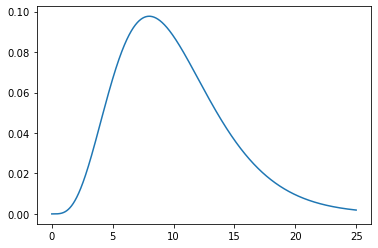

In [101]:
%matplotlib inline
my_chi2_1 = stats.chi2(10)


X = np.arange(0, 25, 0.01)
F = my_chi2_1.pdf(X)

plt.plot(X, F)
plt.show()

## 9. Chi-squared Distribution II

Let $\chi_{1}$ and $\chi_{2}$ be two independent normally distributed random variables with μ=0 and σ2=15.

Instructions:

* Compute $P(\chi_{1}^{2}+\chi_{2}^{2}>10)$.

In [105]:
my_chi2_2 = stats.chi2(2)

1 - my_chi2_2.cdf(10/15)

0.7165313105737892

## 10. Student t Distribution I

Let $X∼t_{10000}$ and $Z∼N(0,1)$.

Instructions:

* Compute the 95% quantile of both distributions. What do you notice?

In [106]:
my_t_1 = stats.t(10000)

print(f't 95% quantile: {my_t_1.ppf(0.95)} \nNorm 95% quantile: {my_norm_1.ppf(0.95)}')

t 95% quantile: 1.6450060180692423 
Norm 95% quantile: 1.6448536269514722


Both values are very close to each other. This is not surprising as for sufficient large degrees of freedom the t distribution can be approximated by the standard normal distribution.

## 11. Student t Distribution II

Let $X∼t_{1}$. Once the session has initialized you will see the plot of the corresponding probability density function (PDF).

Instructions:

* Generate 1000 random numbers from this distribution and assign them to the variable x.

* Compute the sample mean of x. Can you explain the result?

In [123]:
np.random.seed(seed=133515313)
my_t_2 = stats.t(1)
x = my_t_2.rvs(1000)

np.mean(x)

80.46123514896436

Although a t distribution with M = 1 is, as every other t distribution, symmetric around zero it actually has no expectation. This explains the highly non-zero value for the sample mean.

## 12. F Distribution I

Let Y∼F(10,4).

Instructions:

* Plot the quantile function of the given distribution using the function curve().


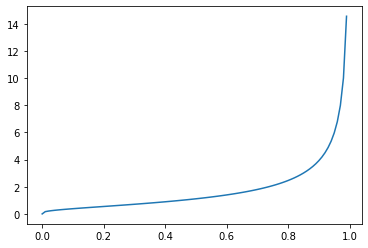

In [125]:
my_f_1 = stats.f(10, 4)

X = np.arange(0, 1, 0.01)
F = my_f_1.ppf(X)

plt.plot(X, F)
plt.show()

## 13. F Distribution II

Let Y∼F(4,5).

Instructions:

* Compute P(1<Y<10) by integration of the PDF.

In [127]:
my_f_2 = stats.f(4, 5)

my_f_2.cdf(10) - my_f_2.cdf(1)

0.47239702300521247